**Stock Market Analysis Project
Objective: The purpose of this project is to analyze historical stock market data, perform exploratory data analysis (EDA), and build a predictive model to forecast stock prices.**


1. Project Setup: Install the necessary libraries


---



In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn yfinance


2. Data Collection:
We will use the yfinance library to fetch stock data.

In [3]:
import yfinance as yf

# Choose a stock symbol (e.g., Apple, Google, Amazon)
symbol = 'AAPL'

# Fetch data for the last 5 years
data = yf.download(symbol, start="2018-01-01", end="2024-01-01")

# Display the first few rows of data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2018-01-02 00:00:00+00:00  40.524345  43.064999  43.075001  42.314999   
2018-01-03 00:00:00+00:00  40.517300  43.057499  43.637501  42.990002   
2018-01-04 00:00:00+00:00  40.705482  43.257500  43.367500  43.020000   
2018-01-05 00:00:00+00:00  41.168926  43.750000  43.842499  43.262501   
2018-01-08 00:00:00+00:00  41.016026  43.587502  43.902500  43.482498   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2018-01-02 00:00:00+00:00  42.540001  102223600  
2018-01-03 00:00:00+00:00  43.132500  118071600  
2018-01-04 00:00:00+00:00  43.134998   89738400  
2018-01-05 00:00:00+00:00  43.360001   94640000  
2018-01-08 00:00:00+00:00  43.587502   82271200  


3. Data Preprocessing:
Perform necessary preprocessing steps such as handling missing values, feature engineering, etc.

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any) with forward fill or interpolation
data.fillna(method='ffill', inplace=True)

# Feature engineering: Adding a "Moving Average" for trend analysis
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Show data with new features
print(data.tail())


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-12-22 00:00:00+00:00  192.656174  193.600006  195.410004  192.970001   
2023-12-26 00:00:00+00:00  192.108856  193.050003  193.889999  192.830002   
2023-12-27 00:00:00+00:00  192.208374  193.149994  193.500000  191.089996   
2023-12-28 00:00:00+00:00  192.636292  193.580002  194.660004  193.169998   
2023-12-29 00:00:00+00:00  191.591370  192.529999  194.399994  191.729996   

Price                            Open    Volume        MA50       MA200  
Ticker                           AAPL      AAPL                          
Date                                                              

<ipython-input-4-d47e526cf3a4>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


4. Exploratory Data Analysis (EDA):  
Visualize the stock’s historical trends and key features using Matplotlib and Seaborn.

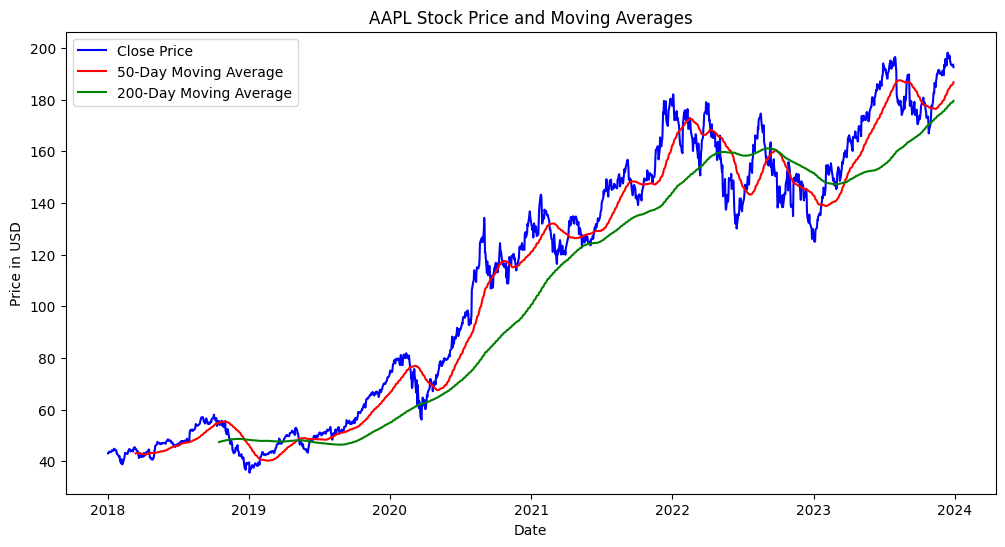

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Closing Price, 50-Day and 200-Day Moving Averages
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(data['MA200'], label='200-Day Moving Average', color='green')
plt.title(f'{symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()


5. Building a Predictive Model:
To predict future stock prices, we will use machine learning. Let's start with a simple Linear Regression model, which can be later extended to more advanced models (like ARIMA, LSTM).

Mean Absolute Error: 1.6948437483801038
Mean Squared Error: 4.844261659245418


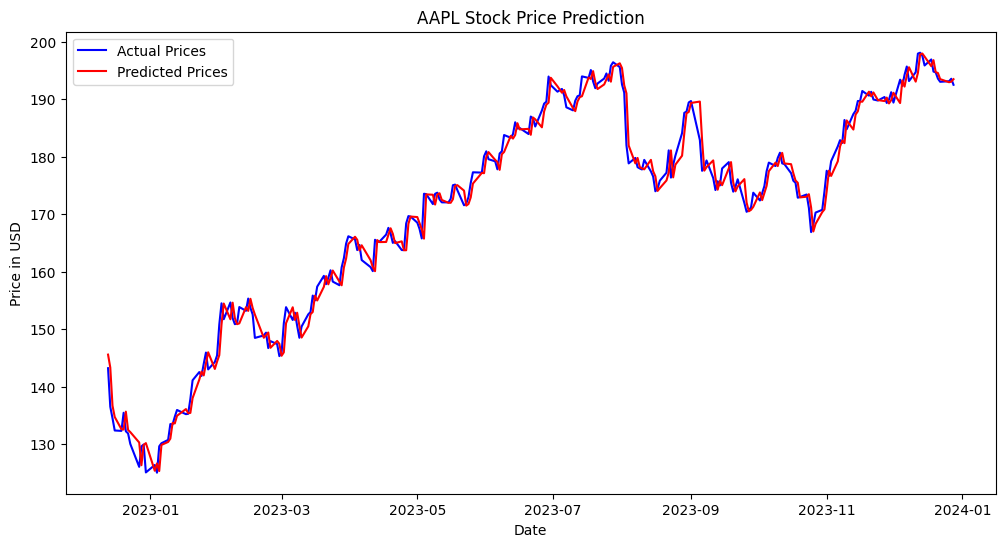

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature Selection: Use 'Close' price and Moving Averages to predict next day's close price
data = data[['Close', 'MA50', 'MA200']].dropna()

# Target: Predict the next day's 'Close' price
data['Target'] = data['Close'].shift(-1)

# Drop last row with NaN target value
data = data[:-1]

# Split data into training and testing sets
X = data[['Close', 'MA50', 'MA200']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the stock prices
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Prices', color='red')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()


6. Advanced Analysis (Optional):
For a more sophisticated model, you could use
*  ARIMA for time series forecasting.
*  A LSTM (Long Short-Term Memory) neural network for deep learning-based stock price prediction.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

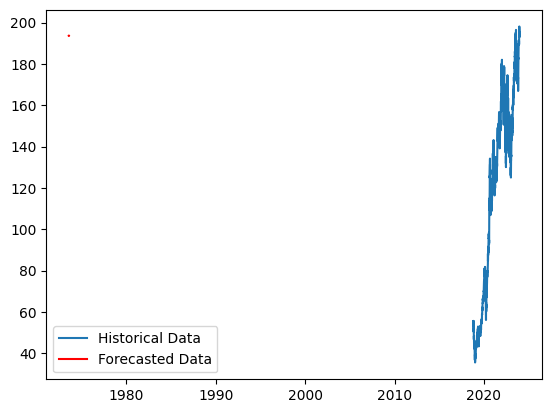

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=5)

# Plot the forecast
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
plt.legend()
plt.show()


Resources and References:


*   Yahoo Finance API (via yfinance)
*   Scikit-learn documentation for Linear Regression

*   Statsmodels for ARIMA
*   Deep Learning-based stock predictions using LSTM (TensorFlow/Keras)




